In [91]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
from sklearn.cluster import KMeans
import math
from sklearn.metrics import confusion_matrix

In [92]:
number_of_clusters = 3
amount_of_points_per_cluster = 20
color1=['yellow','red','green']

[(8.725320733227452, 8.447784213533236), (9.78890010855717, 7.618445549388771), (8.572525241176832, 8.854623832351152), (8.105398216472324, 8.610739865432487), (9.249042655471126, 7.741311061392183), (8.004441930408287, 7.7950404212656945), (7.8139086807112434, 7.446732191168934), (9.136012398976485, 6.819277298539285), (8.928439807650614, 7.620871115850819), (9.876928381452009, 6.878334018137268), (8.15059314027444, 7.599554267544919), (8.37051678294742, 7.130846021342463), (8.73321590532596, 8.10744081786466), (8.175940322503456, 7.084156535433292), (8.14692635688439, 8.999658253535834), (8.35685889617503, 7.132542416872123), (9.248060338975183, 6.998428414526752), (8.379358224915364, 7.384170453993594), (7.841469902452574, 7.474489659671043), (8.184386441198246, 8.382631231520511)]


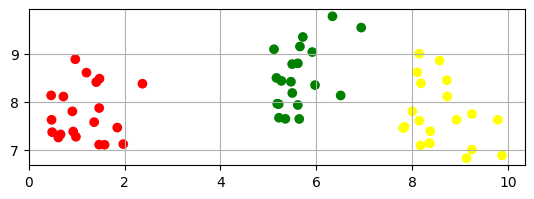

In [102]:

data = []
data_w_color=[]
clusters = []
cluster = []
for i in range(number_of_clusters):
    center = (random.uniform(0, 8), random.uniform(0, 8))
    for j in range(amount_of_points_per_cluster):
            x = center[0] + abs(random.gauss(0, 1))
            y = center[1] + abs(random.gauss(0, 1))
            cluster.append((x,y))
            data.append((x, y))
            data_w_color.append((x,y,color1[i]))
    clusters.append(cluster.copy())
    del cluster[:]
print(clusters[0])
figure, axes = plt.subplots()
axes.set_aspect(1)
x,y, color = zip(*data_w_color)
plt.scatter(x,y,color = color)
plt.grid()
plt.show()


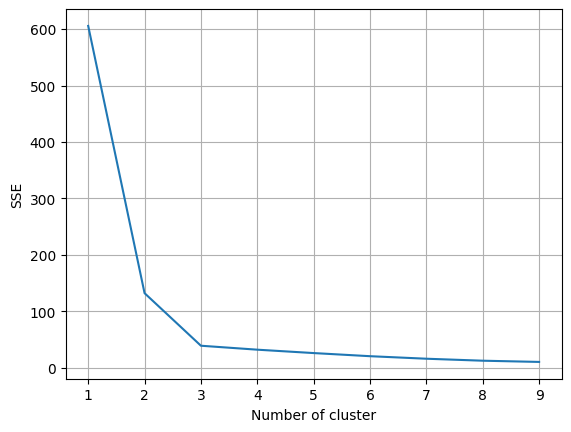

In [103]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, n_init = 10).fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.grid()
plt.show()

<H1>Демонстрация центров и окружностей кластеров</H1>

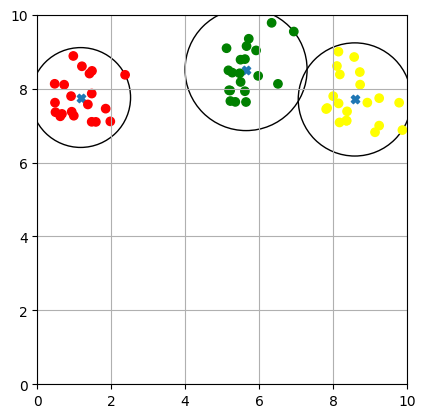

In [104]:
centers = []
c_radius = []
for cluster in clusters:
    center_x = sum(point[0] for point in cluster) / len(cluster)
    center_y = sum(point[1] for point in cluster) / len(cluster)
    c_radius.append(max(*list(math.sqrt((point[0]-center_x)**2+(point[1]-center_y)**2) for point in cluster)))
    centers.append((center_x, center_y))
x_center, y_center = zip(*centers)
figure, axes = plt.subplots()
plt.axis([0, 10, 0, 10])
axes.set_aspect(1)
for i in range(len(c_radius)):
    circle = plt.Circle((x_center[i],y_center[i]), c_radius[i] ,fill = False )
    axes.add_artist(circle)
plt.grid()
plt.scatter(x_center, y_center, marker='X')
plt.scatter(x, y ,color = color)

<H1>Добавление новых точек</H1>

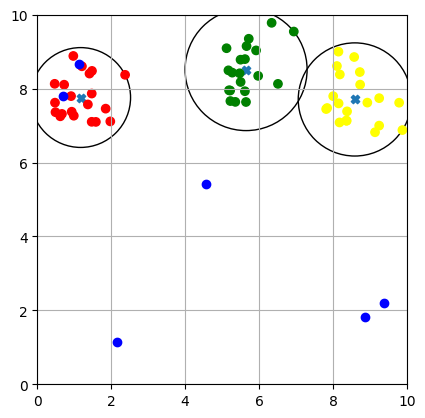

In [105]:
new_points = [(random.uniform(0,10),random.uniform(0,10)) for i in range(int(0.1*number_of_clusters*amount_of_points_per_cluster))]

figure, axes = plt.subplots()
plt.axis([0, 10, 0, 10])
axes.set_aspect(1)
for i in range(len(c_radius)):
    circle = plt.Circle((x_center[i],y_center[i]), c_radius[i] ,fill = False )
    axes.add_artist(circle)
plt.scatter(x_center, y_center, marker='X')
plt.scatter(x, y ,color = color)
x_new,y_new = zip(*new_points)
plt.grid()
plt.scatter(x_new,y_new, c = 'blue')



<H1>Перерасчет кластеров с новыми точками</H1>

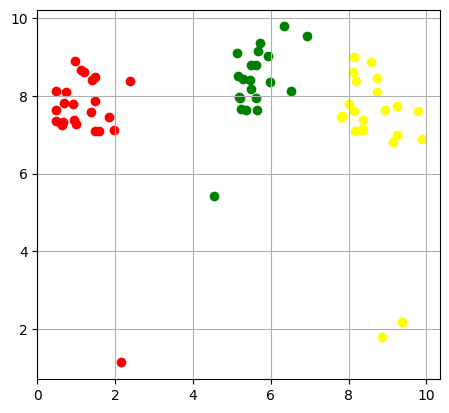

In [106]:
for point in new_points:
    min_distance = float('inf')
    for i in range(len(centers)):
        distance = math.sqrt((centers[i][0]-point[0])**2+(centers[i][1]-point[1])**2)
        if distance < min_distance:
            min_distance = distance
            cluster_number = i
    clusters[cluster_number].append(point)
figure, axes = plt.subplots()
axes.set_aspect(1)
for i in range(len(clusters)):
    new_x_clusters, new_y_clusters = zip(*clusters[i])
    plt.scatter(new_x_clusters, new_y_clusters ,color = color1[i])
plt.grid()


<H1>Поиск нового центра и радиуса окружности</H1>

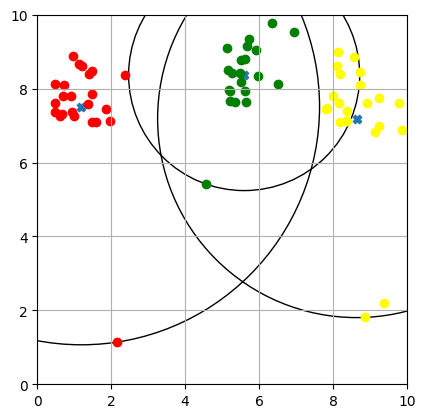

In [107]:
centers = []
c_radius2 = []
for cluster in clusters:
    center_x = sum(point[0] for point in cluster) / len(cluster)
    center_y = sum(point[1] for point in cluster) / len(cluster)
    c_radius2.append(max(*list(math.sqrt((point[0]-center_x)**2+(point[1]-center_y)**2) for point in cluster)))
    centers.append((center_x, center_y))
x_center, y_center = zip(*centers)
figure, axes = plt.subplots()
axes.set_aspect(1)
plt.axis([0, 10, 0, 10])
for i in range(len(c_radius2)):
    circle = plt.Circle((x_center[i],y_center[i]), c_radius2[i] ,fill = False )
    axes.add_artist(circle)
plt.grid()
plt.scatter(x_center, y_center, marker='X')
for i in range(len(clusters)):
    new_x_clusters, new_y_clusters = zip(*clusters[i])
    plt.scatter(new_x_clusters, new_y_clusters ,color = color1[i])

<H1>Итоговый цикл</H1>

[(8.637412902507647, 7.187719438253459), (1.1914267958200124, 7.51215982531779), (5.595416418583824, 8.367250596444698)]


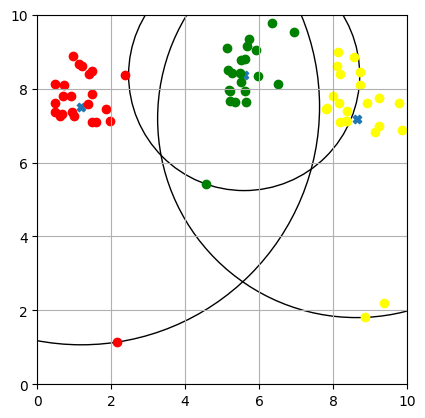

In [108]:
z = 0
c_radius3 = []
while z < 5:
    for cluster in clusters:
        for k in range(len(cluster)):
            min_distance = float('inf')
            try:
                if cluster[k]: pass
            except:
                break
            for i in range(len(centers)):
                distance = math.sqrt((centers[i][0]-cluster[k][0])**2+(centers[i][1]-cluster[k][1])**2)
                if distance < min_distance:
                    min_distance = distance
                    cluster_number = i
            clusters[cluster_number].append(cluster.pop(k))
    del centers[:]
    del c_radius3[:]
    for cluster in clusters:
        center_x = sum(point[0] for point in cluster) / len(cluster)
        center_y = sum(point[1] for point in cluster) / len(cluster)
        centers.append((center_x, center_y))
        c_radius3.append(max(*list(math.sqrt((point[0]-center_x)**2+(point[1]-center_y)**2) for point in cluster)))
    z+=1
print(centers)
x_center, y_center = zip(*centers)
figure, axes = plt.subplots()
plt.axis([0, 10, 0, 10])
axes.set_aspect(1)
for i in range(len(c_radius3)):
    circle = plt.Circle((x_center[i],y_center[i]), c_radius3[i] ,fill = False )
    axes.add_artist(circle)
plt.grid()
plt.scatter(x_center, y_center, marker='X')
for i in range(len(clusters)):
    new_x_clusters, new_y_clusters = zip(*clusters[i])
    plt.scatter(new_x_clusters, new_y_clusters ,color = color1[i])

[(8.637412902507647, 7.187719438253459), (1.1914267958200124, 7.512159825317791), (5.595416418583824, 8.367250596444697)]


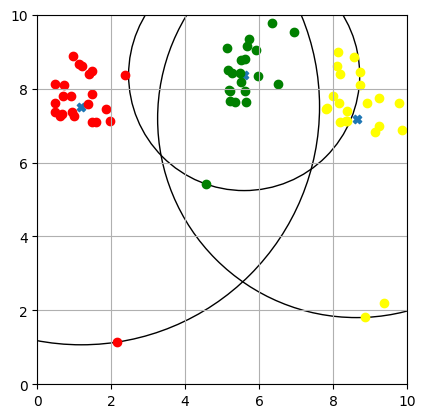

In [109]:
z = 0
c_radius3 = []
while z < 10000:
    for cluster in clusters:
        for k in range(len(cluster)):
            min_distance = float('inf')
            try:
                if cluster[k]: pass
            except:
                break
            for i in range(len(centers)):
                distance = math.sqrt((centers[i][0]-cluster[k][0])**2+(centers[i][1]-cluster[k][1])**2)
                if distance < min_distance:
                    min_distance = distance
                    cluster_number = i
            clusters[cluster_number].append(cluster.pop(k))
    del centers[:]
    del c_radius3[:]
    for cluster in clusters:
        center_x = sum(point[0] for point in cluster) / len(cluster)
        center_y = sum(point[1] for point in cluster) / len(cluster)
        centers.append((center_x, center_y))
        c_radius3.append(max(*list(math.sqrt((point[0]-center_x)**2+(point[1]-center_y)**2) for point in cluster)))
    z+=1
print(centers)
x_center, y_center = zip(*centers)
figure, axes = plt.subplots()
plt.axis([0, 10, 0, 10])
axes.set_aspect(1)
for i in range(len(c_radius3)):
    circle = plt.Circle((x_center[i],y_center[i]), c_radius3[i] ,fill = False )
    axes.add_artist(circle)
plt.grid()
plt.scatter(x_center, y_center, marker='X')
for i in range(len(clusters)):
    new_x_clusters, new_y_clusters = zip(*clusters[i])
    plt.scatter(new_x_clusters, new_y_clusters ,color = color1[i])